In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline




In [5]:

file_path = r"D:\5th Sem\ML\DATASET\energy+efficiency\ENB2012_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check data types
print("\nData types:")
print(data.dtypes)

# Get the shape of the dataset
print("\nDataset shape:")
print(data.shape)

# If column names need cleaning or are not properly labeled, rename them
# Assuming standard column names for this dataset, but adjust if needed
if 'X1' in data.columns:  # Check if columns have default names like X1, X2, etc.
    # Rename columns based on the Energy Efficiency dataset standard names
    data.columns = [
        'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
        'Heating_Load', 'Cooling_Load'
    ]
    # Update X and y after renaming
    X = data.iloc[:, :-2]  # All columns except the last two
    y_heating = data.iloc[:, -2]  # Heating load

print("\nUpdated column names:")
print(data.columns.tolist())

First 5 rows of the dataset:
     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28

Missing values in each column:
X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64

Data types:
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object

Dataset shape:
(1296, 10)

Updated column names:
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


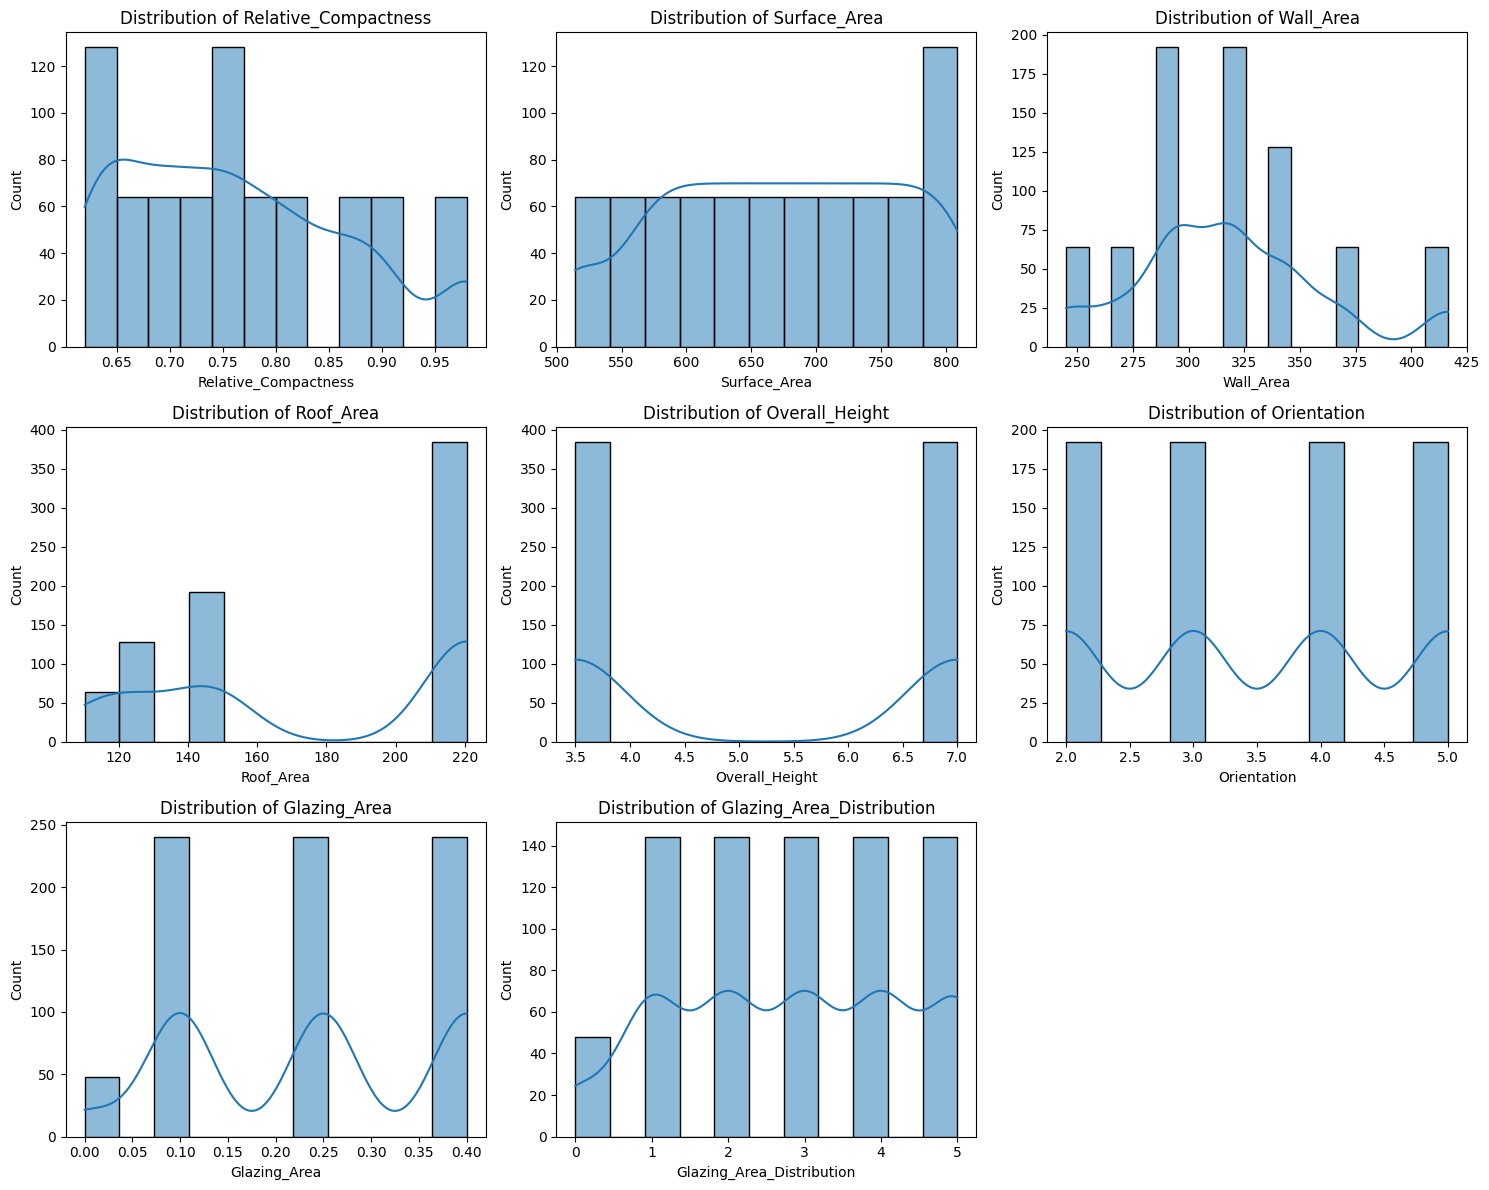

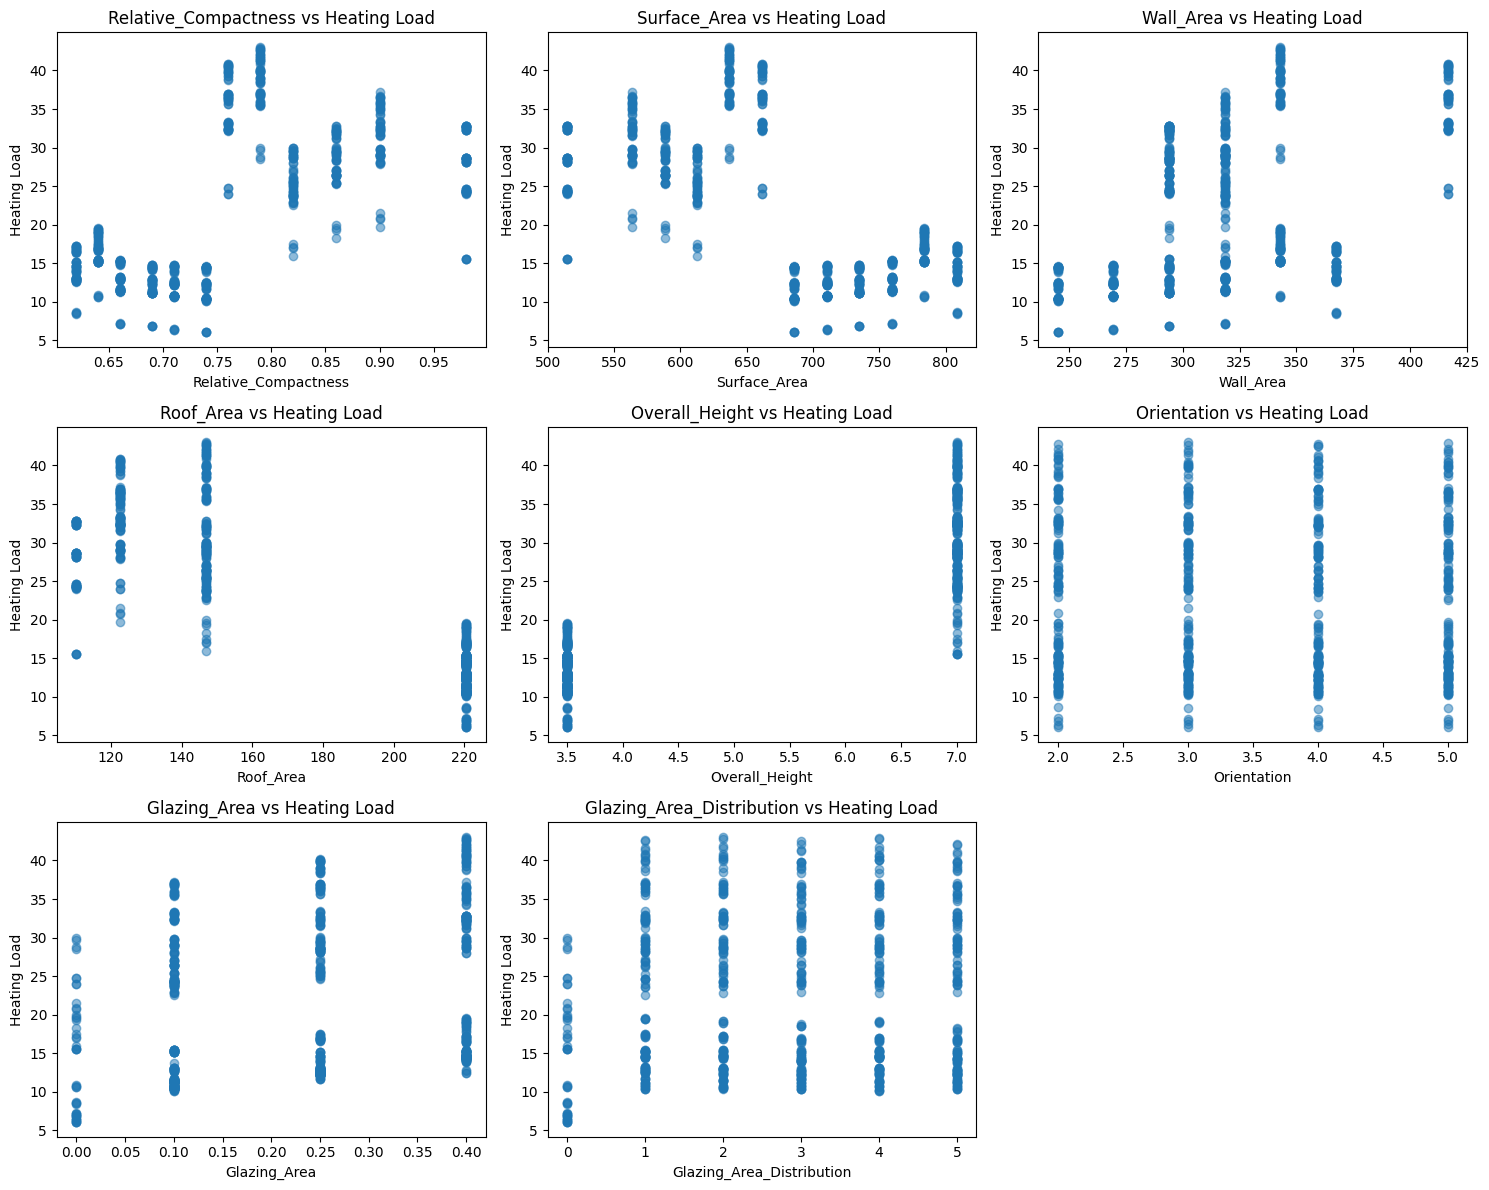

In [6]:

# Step 2: Visualize feature distributions
plt.figure(figsize=(15, 12))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Visualize relationship between features and target
plt.figure(figsize=(15, 12))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(X[column], y_heating, alpha=0.5)
    plt.title(f'{column} vs Heating Load')
    plt.xlabel(column)
    plt.ylabel('Heating Load')
plt.tight_layout()
plt.show()



Columns in the dataset:
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


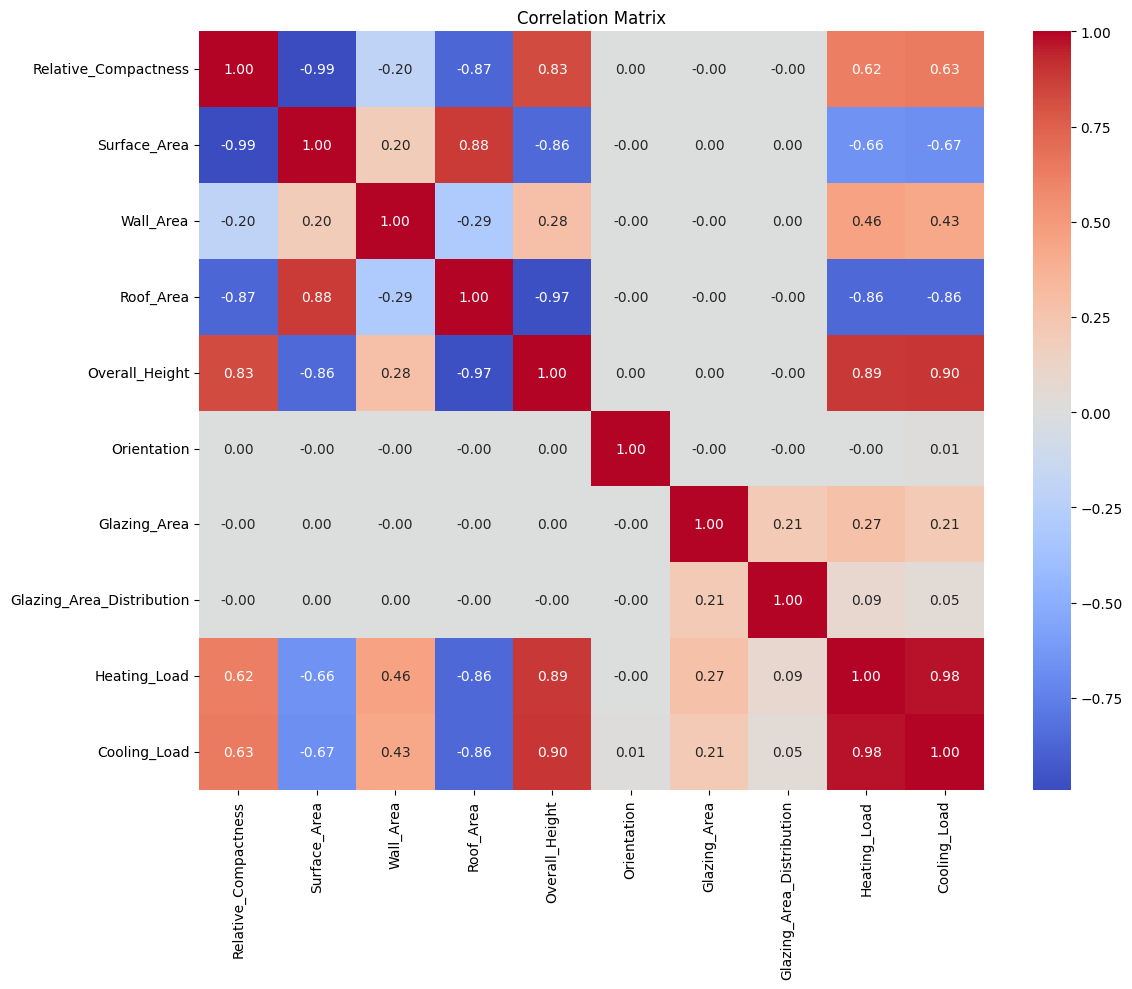

In [7]:
# Identify column names to distinguish features and targets
print("\nColumns in the dataset:")
print(data.columns.tolist())

# Assuming the column names based on typical energy efficiency datasets
# Note: We'll adjust this once we see the actual data
# Typically features might include wall area, roof area, orientation, glazing area, etc.
# And the target would be heating load

# Assuming last two columns are heating_load and cooling_load
X = data.iloc[:, :-2]  # All columns except the last two
y_heating = data.iloc[:, -2]  # Heating load (assumed second to last column)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [8]:
# Step 3: Data Cleaning and Preparation
print("=== DATA CLEANING ===")
print("Checking for missing values:")
print(data.isnull().sum())

# Clean the data by removing missing values
data_clean = data.dropna()
print(f"\nDropped {len(data) - len(data_clean)} rows with missing values")
print(f"Clean dataset shape: {data_clean.shape}")

# Define features and target from clean data
if 'Heating_Load' in data_clean.columns:
    X = data_clean.drop(['Heating_Load', 'Cooling_Load'], axis=1)
    y_heating = data_clean['Heating_Load']
else:
    X = data_clean.iloc[:, :-2]
    y_heating = data_clean.iloc[:, -2]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y_heating.shape}")

# Verify no missing values remain
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y_heating.isnull().sum()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)
print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

=== DATA CLEANING ===
Checking for missing values:
Relative_Compactness         528
Surface_Area                 528
Wall_Area                    528
Roof_Area                    528
Overall_Height               528
Orientation                  528
Glazing_Area                 528
Glazing_Area_Distribution    528
Heating_Load                 528
Cooling_Load                 528
dtype: int64

Dropped 528 rows with missing values
Clean dataset shape: (768, 10)
Features shape: (768, 8)
Target shape: (768,)
Missing values in X: 0
Missing values in y: 0

Train set: 614 samples
Test set: 154 samples


=== LINEAR REGRESSION ANALYSIS ===

Linear Regression Performance:
Training R² score: 0.9171
Testing R² score: 0.9122
Training MAE: 2.0414
Testing MAE: 2.1820
Training RMSE: 2.8931
Testing RMSE: 3.0254


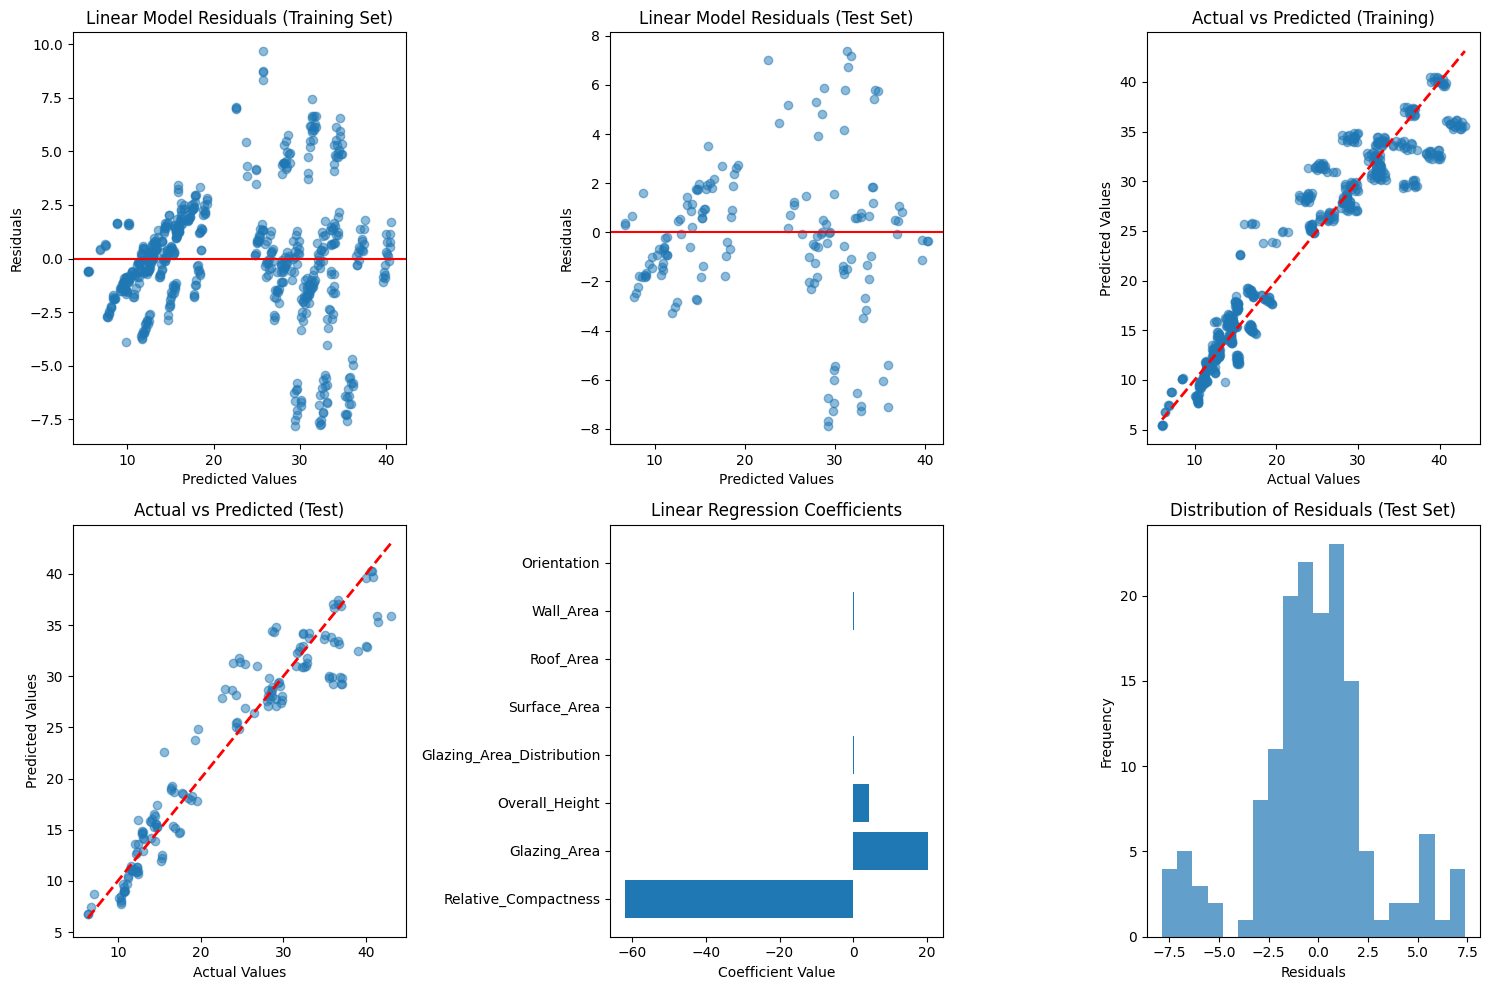

In [9]:
# Step 4: LINEAR REGRESSION ANALYSIS
print("=== LINEAR REGRESSION ANALYSIS ===")

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression model
linear_train_r2 = r2_score(y_train, y_train_pred_linear)
linear_test_r2 = r2_score(y_test, y_test_pred_linear)
linear_train_mae = mean_absolute_error(y_train, y_train_pred_linear)
linear_test_mae = mean_absolute_error(y_test, y_test_pred_linear)
linear_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print("\nLinear Regression Performance:")
print(f"Training R² score: {linear_train_r2:.4f}")
print(f"Testing R² score: {linear_test_r2:.4f}")
print(f"Training MAE: {linear_train_mae:.4f}")
print(f"Testing MAE: {linear_test_mae:.4f}")
print(f"Training RMSE: {linear_train_rmse:.4f}")
print(f"Testing RMSE: {linear_test_rmse:.4f}")

# Plot comprehensive linear regression analysis
plt.figure(figsize=(15, 10))

# Residual plots
plt.subplot(2, 3, 1)
plt.scatter(y_train_pred_linear, y_train_pred_linear - y_train, alpha=0.5)
plt.title('Linear Model Residuals (Training Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.subplot(2, 3, 2)
plt.scatter(y_test_pred_linear, y_test_pred_linear - y_test, alpha=0.5)
plt.title('Linear Model Residuals (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

# Actual vs Predicted plots
plt.subplot(2, 3, 3)
plt.scatter(y_train, y_train_pred_linear, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Training)')

plt.subplot(2, 3, 4)
plt.scatter(y_test, y_test_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Test)')

# Feature importance
plt.subplot(2, 3, 5)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')

# Distribution of residuals
plt.subplot(2, 3, 6)
residuals = y_test_pred_linear - y_test
plt.hist(residuals, bins=20, alpha=0.7)
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

X shape: (768, 8)
y_heating shape: (768,)

Summary statistics for Heating Load:
count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating_Load, dtype: float64


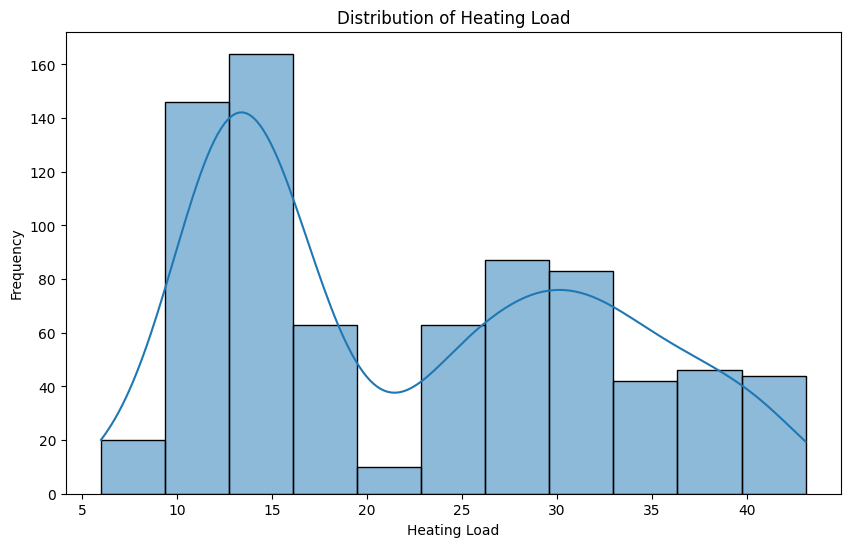

In [10]:
# Let's ensure our feature and target variables are properly defined
# Check if X and y_heating are already defined correctly
try:
    # Check if these variables exist and have data
    print("X shape:", X.shape)
    print("y_heating shape:", y_heating.shape)
except (NameError, AttributeError):
    # If not defined properly, redefine them
    print("Redefining X and y_heating...")
    # Make sure we're using the properly named columns
    if 'Heating_Load' in data.columns:
        X = data.drop(['Heating_Load', 'Cooling_Load'], axis=1)
        y_heating = data['Heating_Load']
    else:
        # Fallback if column renaming didn't happen
        X = data.iloc[:, :-2]  # All columns except the last two
        y_heating = data.iloc[:, -2]  # Heating load

# Display summary statistics for our target variable
print("\nSummary statistics for Heating Load:")
print(y_heating.describe())

# Create a simple plot to visualize the distribution of our target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_heating, kde=True)
plt.title('Distribution of Heating Load')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()

=== POLYNOMIAL REGRESSION ANALYSIS ===
Polynomial Degree 1 - Train R²: 0.9171, Test R²: 0.9122
Polynomial Degree 2 - Train R²: 0.9952, Test R²: 0.9938
Polynomial Degree 3 - Train R²: 0.9984, Test R²: 0.9972


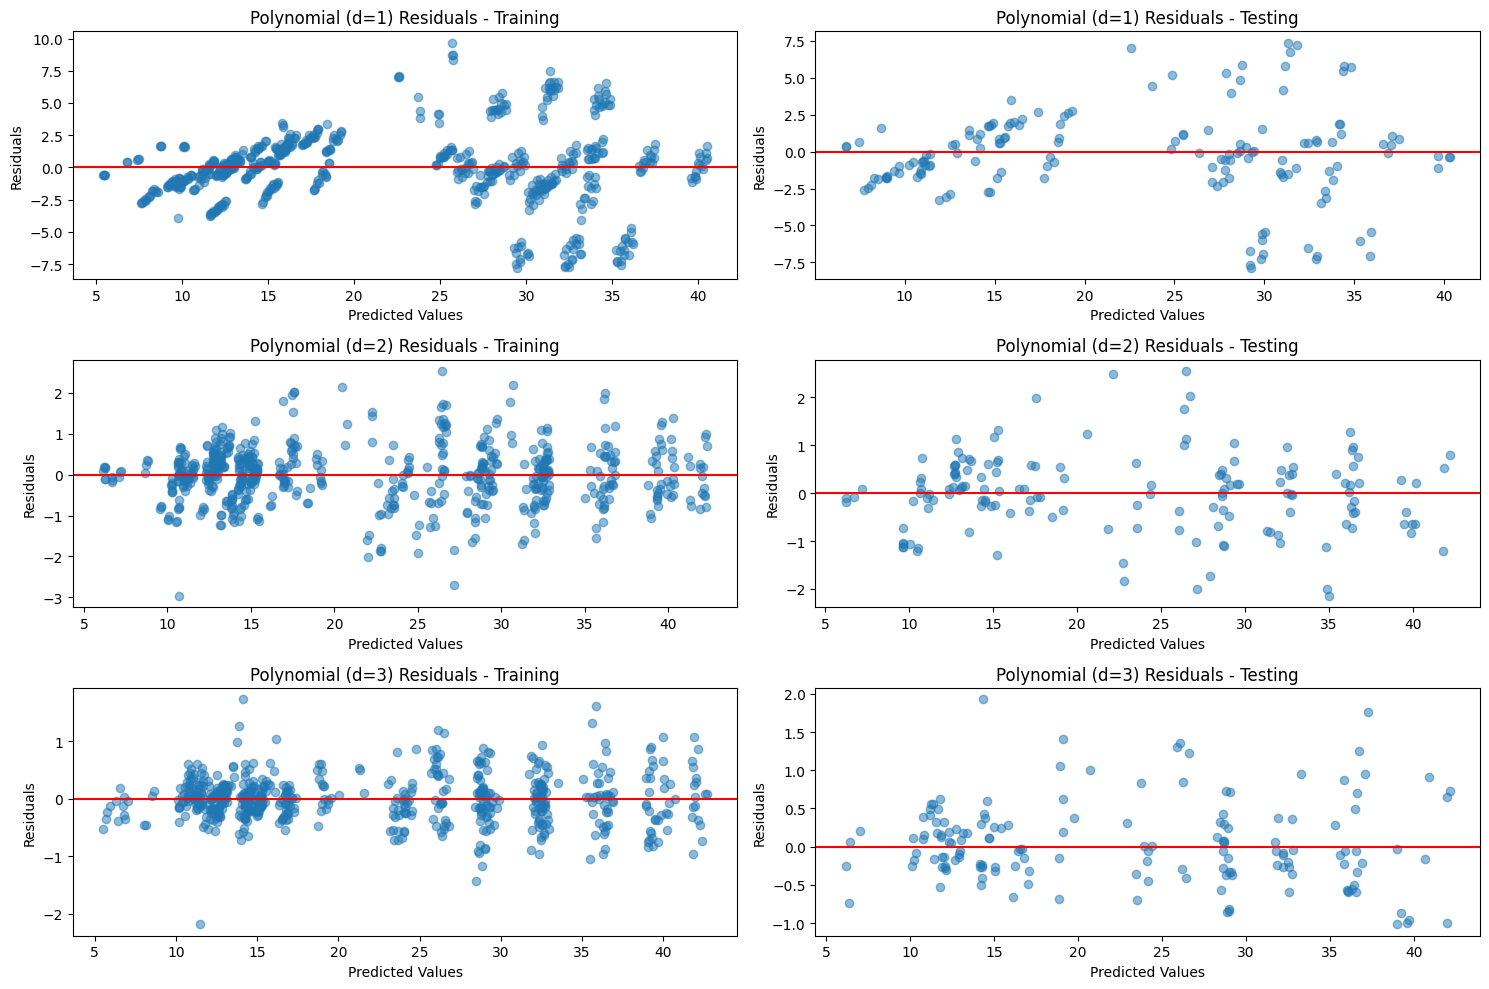

In [11]:
# Step 5: POLYNOMIAL REGRESSION ANALYSIS
print("=== POLYNOMIAL REGRESSION ANALYSIS ===")

# We'll test different degrees
poly_results = []
max_degree = 3

plt.figure(figsize=(15, 10))
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    poly_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_poly = poly_model.predict(X_train)
    y_test_pred_poly = poly_model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred_poly)
    test_r2 = r2_score(y_test, y_test_pred_poly)
    train_mae = mean_absolute_error(y_train, y_train_pred_poly)
    test_mae = mean_absolute_error(y_test, y_test_pred_poly)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
    
    poly_results.append({
        'degree': degree,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    })
    
    print(f"Polynomial Degree {degree} - Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    
    # Plot residuals
    plt.subplot(max_degree, 2, 2*degree-1)
    plt.scatter(y_train_pred_poly, y_train_pred_poly - y_train, alpha=0.5)
    plt.title(f'Polynomial (d={degree}) Residuals - Training')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    
    plt.subplot(max_degree, 2, 2*degree)
    plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.5)
    plt.title(f'Polynomial (d={degree}) Residuals - Testing')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()


Polynomial Regression Results:
   degree  train_r2   test_r2  train_mae  test_mae  train_rmse  test_rmse
0       1  0.917065  0.912184   2.041364  2.182047    2.893119   3.025424
1       2  0.995176  0.993814   0.522499  0.604200    0.697742   0.802956
2       3  0.998379  0.997172   0.293713  0.411078    0.404525   0.542950


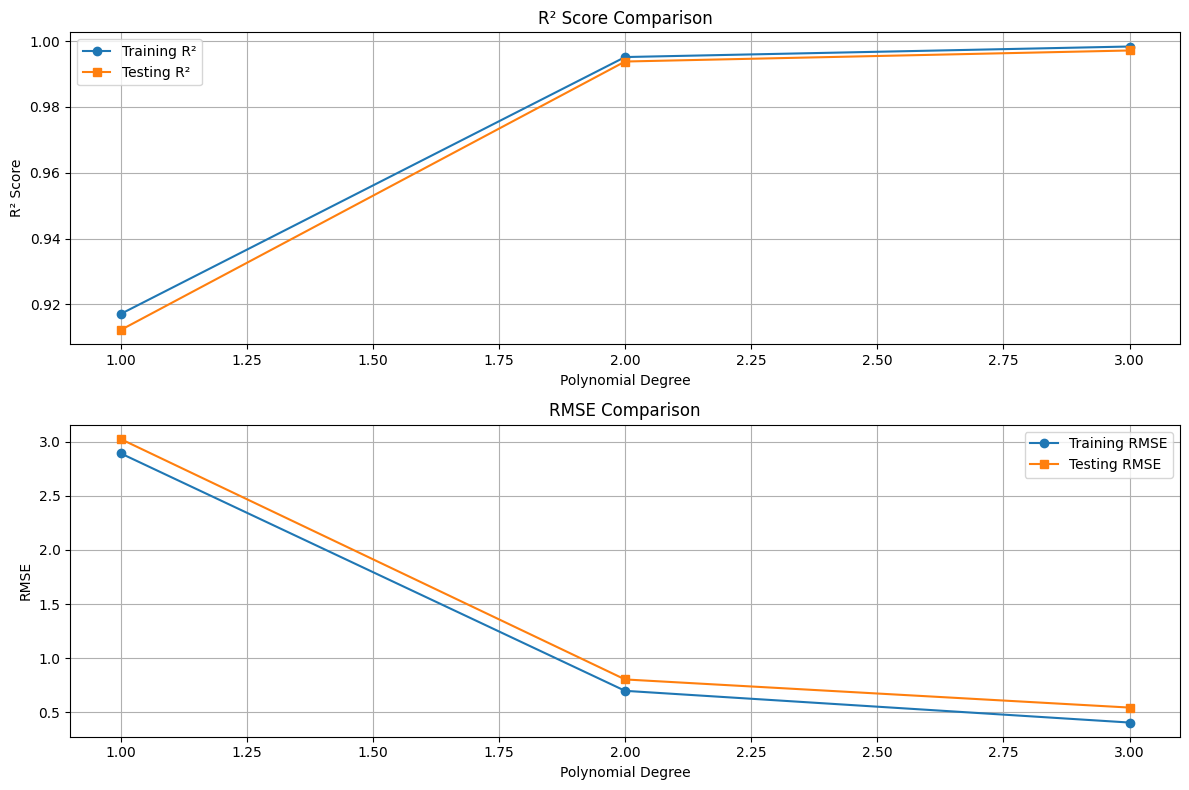

In [12]:

# Step 6: Compare polynomial models
results_df = pd.DataFrame(poly_results)
print("\nPolynomial Regression Results:")
print(results_df)

# Plot performance metrics for comparison
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(results_df['degree'], results_df['train_r2'], marker='o', label='Training R²')
plt.plot(results_df['degree'], results_df['test_r2'], marker='s', label='Testing R²')
plt.title('R² Score Comparison')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(results_df['degree'], results_df['train_rmse'], marker='o', label='Training RMSE')
plt.plot(results_df['degree'], results_df['test_rmse'], marker='s', label='Testing RMSE')
plt.title('RMSE Comparison')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Step 7: LOGISTIC REGRESSION ANALYSIS (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

print("=== LOGISTIC REGRESSION ANALYSIS ===")
print("Converting continuous heating load to classification problem...")

# Convert heating load to binary classification (High vs Low)
y_heating_median = y_heating.median()
y_binary = (y_heating > y_heating_median).astype(int)
print(f"Median heating load: {y_heating_median:.2f}")
print(f"Class distribution - High heating load (1): {y_binary.sum()}, Low heating load (0): {len(y_binary) - y_binary.sum()}")

# Scale features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Fit logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_cls, y_train_cls)

# Make predictions
y_train_pred_cls = logistic_model.predict(X_train_cls)
y_test_pred_cls = logistic_model.predict(X_test_cls)
y_test_pred_proba = logistic_model.predict_proba(X_test_cls)[:, 1]

# Evaluate logistic regression model
train_accuracy = accuracy_score(y_train_cls, y_train_pred_cls)
test_accuracy = accuracy_score(y_test_cls, y_test_pred_cls)

print(f"\nLogistic Regression Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test_cls, y_test_pred_cls, target_names=['Low Heating Load', 'High Heating Load']))

=== LOGISTIC REGRESSION ANALYSIS ===
Converting continuous heating load to classification problem...
Median heating load: 18.95
Class distribution - High heating load (1): 384, Low heating load (0): 384

Logistic Regression Performance:
Training Accuracy: 0.9756
Testing Accuracy: 0.9805

Classification Report (Test Set):
                   precision    recall  f1-score   support

 Low Heating Load       0.97      0.99      0.98        77
High Heating Load       0.99      0.97      0.98        77

         accuracy                           0.98       154
        macro avg       0.98      0.98      0.98       154
     weighted avg       0.98      0.98      0.98       154



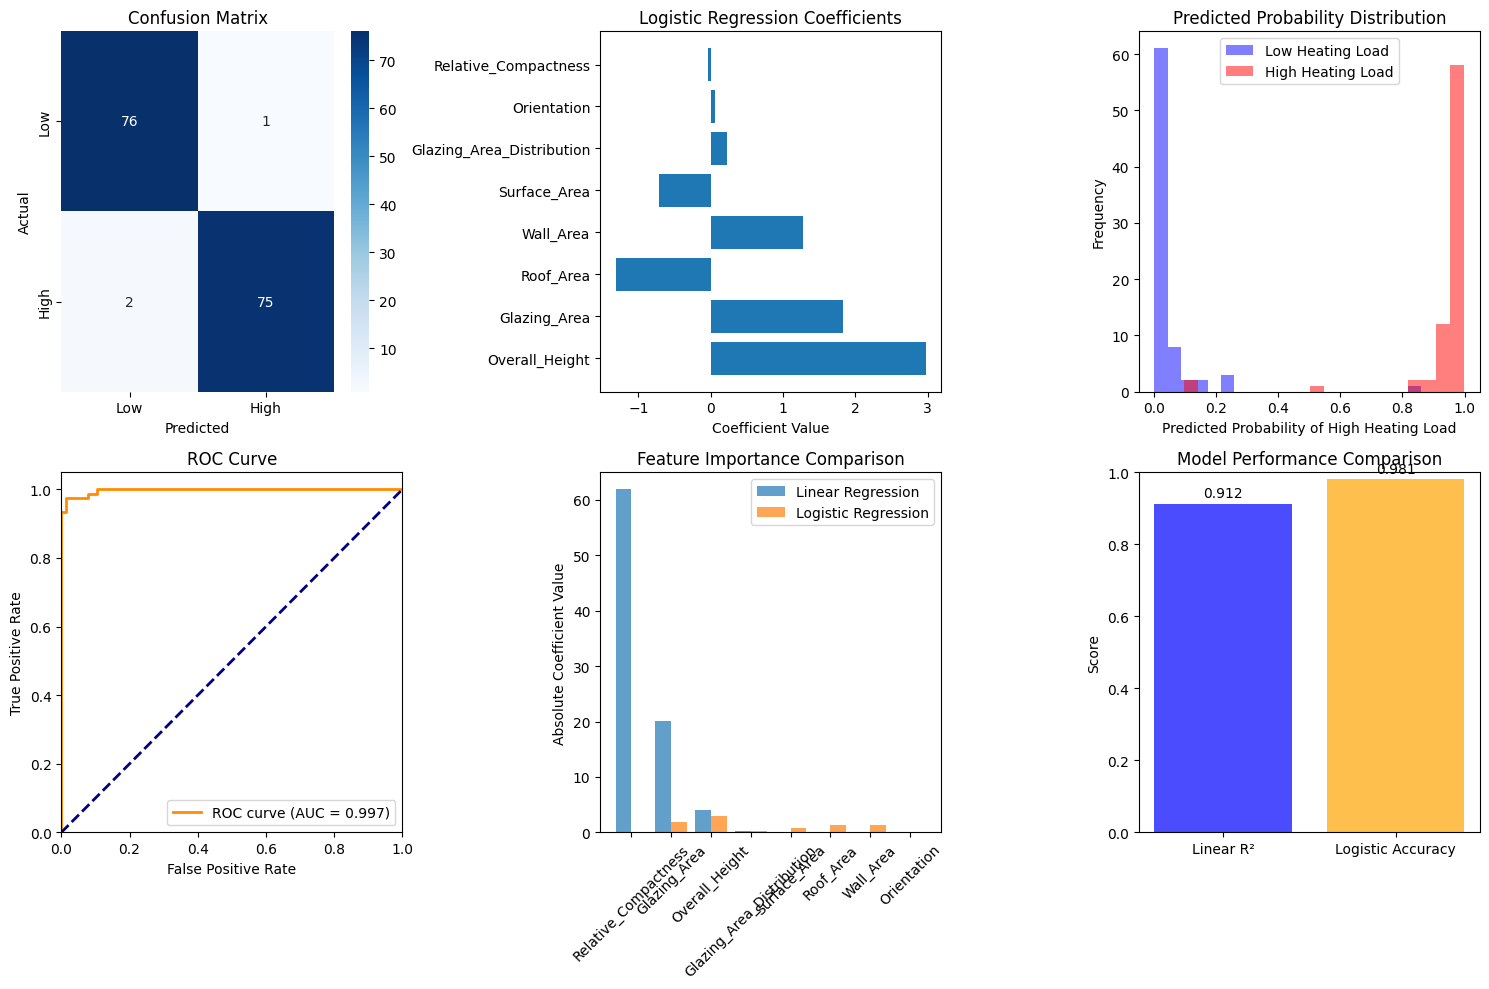

In [14]:
# Step 8: Visualize Logistic Regression Results
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 3, 1)
cm = confusion_matrix(y_test_cls, y_test_pred_cls)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance (coefficients)
plt.subplot(2, 3, 2)
feature_importance_cls = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
})
feature_importance_cls = feature_importance_cls.sort_values('Coefficient', key=abs, ascending=False)
plt.barh(feature_importance_cls['Feature'], feature_importance_cls['Coefficient'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')

# Probability distribution
plt.subplot(2, 3, 3)
plt.hist(y_test_pred_proba[y_test_cls == 0], alpha=0.5, label='Low Heating Load', bins=20, color='blue')
plt.hist(y_test_pred_proba[y_test_cls == 1], alpha=0.5, label='High Heating Load', bins=20, color='red')
plt.title('Predicted Probability Distribution')
plt.xlabel('Predicted Probability of High Heating Load')
plt.ylabel('Frequency')
plt.legend()

# ROC Curve
plt.subplot(2, 3, 4)
fpr, tpr, _ = roc_curve(y_test_cls, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Feature importance comparison (Linear vs Logistic)
plt.subplot(2, 3, 5)
comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear_Coef': np.abs(linear_model.coef_),
    'Logistic_Coef': np.abs(logistic_model.coef_[0])
})
comparison_df = comparison_df.sort_values('Linear_Coef', ascending=False)
x_pos = np.arange(len(comparison_df))
plt.bar(x_pos - 0.2, comparison_df['Linear_Coef'], 0.4, label='Linear Regression', alpha=0.7)
plt.bar(x_pos + 0.2, comparison_df['Logistic_Coef'], 0.4, label='Logistic Regression', alpha=0.7)
plt.xticks(x_pos, comparison_df['Feature'], rotation=45)
plt.title('Feature Importance Comparison')
plt.ylabel('Absolute Coefficient Value')
plt.legend()

# Model performance comparison
plt.subplot(2, 3, 6)
models = ['Linear R²', 'Logistic Accuracy']
scores = [linear_test_r2, test_accuracy]
colors = ['blue', 'orange']
bars = plt.bar(models, scores, color=colors, alpha=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.01, f'{score:.3f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()